# Виконання

## Завдання третє

### Для початку імпортуємо модулі. Завантажимо датафрейм та виведемо його вміст.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
np.random.seed(10)

from sklearn import cluster, datasets, mixture
X1,Y1 = datasets.make_moons(n_samples=2000, noise=.09,random_state=10)

*Сутності*

### Тренуємо моделі та прогнузуємо результати.

In [25]:
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

birchmodel=Birch(n_clusters=2,threshold=0.5,branching_factor=100)
y_birch=birchmodel.fit_predict(X1)

agnesmodel = AgglomerativeClustering(n_clusters=2)
y_agnes=birchmodel.fit_predict(X1)

*Тренування моделей та прогнозування результатів*

### Зобразимо результати кластеризації.

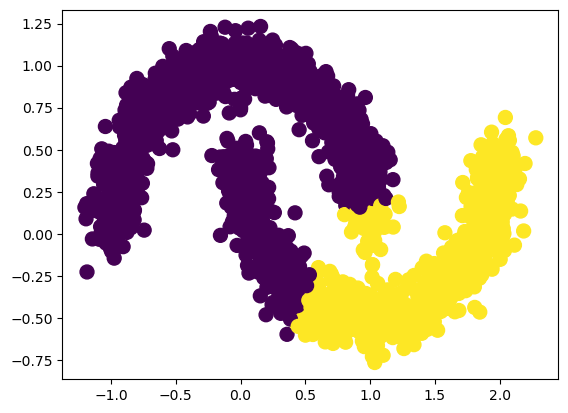

In [26]:
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_birch)
plt.show()

*кластеризація Birch*

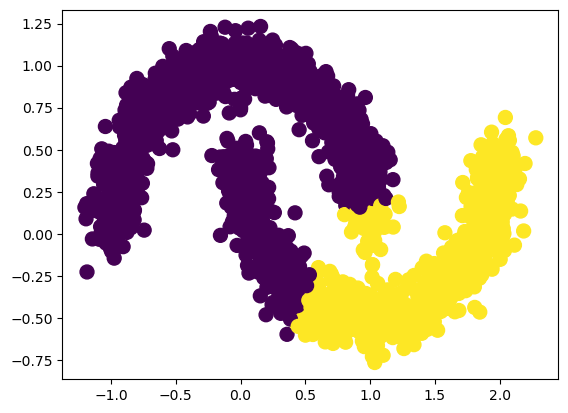

In [27]:
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_agnes)
plt.show()

*кластеризація AGNES*

### Натренуємо модель DBSCAN.

In [28]:
def MyDBSCAN(D, eps, MinPts):  
    labels = [0]*len(D)
    C = 0
    for P in range(0, len(D)):
        if not (labels[P] == 0):
           continue
        NeighborPts = regionQuery(D, P, eps)
        if len(NeighborPts) < MinPts:
            labels[P] = -1    
        else: 
           C += 1
           growCluster(D, labels, P, NeighborPts, C, eps, MinPts)

    return labels


def growCluster(D, labels, P, NeighborPts, C, eps, MinPts):
    labels[P] = C
    i = 0
    while i < len(NeighborPts):    
        Pn = NeighborPts[i]
        if labels[Pn] == -1:
           labels[Pn] = C
        elif labels[Pn] == 0:
            labels[Pn] = C
            PnNeighborPts = regionQuery(D, Pn, eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts
        i += 1        


def regionQuery(D, P, eps):

    neighbors = []
    
    for Pn in range(0, len(D)):
        
        if np.linalg.norm(D[P] - D[Pn]) < eps:
           neighbors.append(Pn)
            
    return neighbors

*Тренування DBSCAN*

### Прогнозування DBSCAN.

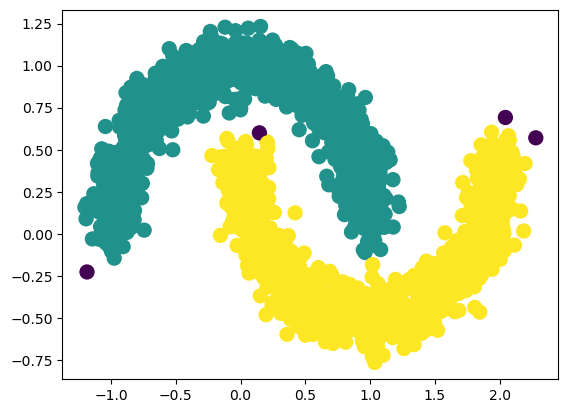

In [32]:
dbscanmodel = DBSCAN(eps=0.2, min_samples=70)
y_dbscan=dbscanmodel.fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_dbscan)
plt.show()

*кластеризація DBSCAN*

### Розрахуємо метрики ARI, NMI, Silhouette Coefficient для кожного методу.

In [30]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import silhouette_score

for (name, pred) in [('Birch', y_birch), ('AGNES', y_agnes), ('DBSCAN', y_dbscan)]:
    print(f'ARI {name}: {adjusted_rand_score(Y1, pred)}')
    print(f'NMI {name}: {normalized_mutual_info_score(Y1, pred)}')
    print(f'Silhouette Coefficient {name}: {silhouette_score(X1, pred)}')

ARI Birch: 0.3767076067566142
NMI Birch: 0.341366173543779
Silhouette Coefficient Birch: 0.45835031870569487
ARI AGNES: 0.3767076067566142
NMI AGNES: 0.341366173543779
Silhouette Coefficient AGNES: 0.45835031870569487
ARI DBSCAN: 0.9920149895714532
NMI DBSCAN: 0.9787649300611727


Silhouette Coefficient DBSCAN: 0.3010813290557993


*Розраховані метрики ARI, NMI, Silhouette Coefficient*

## Пояснення результатів

### Для Birch і AGNES обидві моделі мають подібні показники ARI і NMI, що вказує на помірну подібність і взаємну інформацію між їх кластеризацією.

### Для DBSCAN він має значно вищі показники ARI та NMI, що свідчить про кращу відповідність і більшу згоду з справжніми кластеризаціями порівняно з Birch та AGNES.

### Однак коефіцієнт силуету для DBSCAN нижчий, ніж у Birch і AGNES, що свідчить про те, що кластери в DBSCAN можуть бути не так добре розділені та можуть містити деякі точки, що перекриваються.

### Підсумовуючи, оцінки ARI та NMI дають змогу зрозуміти подібність і взаємну інформацію між результатами кластеризації, тоді як коефіцієнт силуету оцінює якість і поділ кластерів. Різні моделі можуть перевершувати в різних аспектах, а вибір алгоритму кластеризації залежить від конкретних цілей і характеристик даних.